In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import time

In [7]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [8]:
a.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
a[:, :1]

array([[1],
       [4],
       [7]])

In [10]:
device = torch.device('cuda:3')

data = torch.tensor(pd.read_csv("../data/mnist/train.csv", header=None).values)
x, y = (data[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(data[:, 0].long(), 10).to(device)

test = torch.tensor(pd.read_csv("../data/mnist/test.csv", header=None).values)
x_test, y_test = (test[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(test[:, 0].long(), 10).to(device)

In [11]:
class Real(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc4(x)
        return x
model = Real()
model.to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=1.2e-3)
losses = []

In [12]:
# for epoch in tqdm(range(1000)):
#     batch_size = 2**13
#     for i in range(0, len(x), batch_size):
#         batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
#         optimiser.zero_grad()
#         output = model(batch_x)
#         loss = F.mse_loss(output, batch_y)
#         loss.backward()
#         optimiser.step()
#     losses.append(loss.item())

In [13]:
t_f = 0
t_b = 0

for epoch in tqdm(range(1000)):
    batch_size = 2**13
    for i in range(0, len(x), batch_size):
        batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
        optimiser.zero_grad()
        t0 = time.time()
        output = model(batch_x)
        t_f += time.time() - t0
        t0 = time.time()
        loss = F.mse_loss(output, batch_y)
        loss.backward()
        t_b += time.time() - t0
        optimiser.step()
    losses.append(loss.item())

100%|██████████| 1000/1000 [00:15<00:00, 66.11it/s]


In [14]:
t_f, t_b

(2.5961360931396484, 5.592581510543823)

Training Accuracy: 98.70%
Testing Accuracy: 94.85%


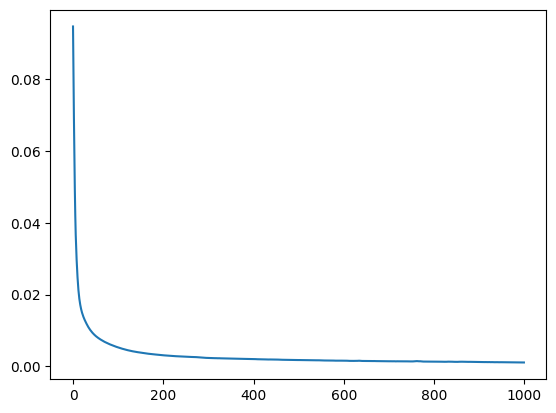

In [15]:
accuracy = (model(x).argmax(1) == y.argmax(1)).sum().item()/len(x)
print(f"Training Accuracy: {accuracy*100:.2f}%")

accuracy = (model(x_test).argmax(1) == y_test.argmax(1)).sum().item()/len(x_test)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

plt.plot(range(len(losses)), losses)